# Gradient Descent

Gradient descent is one the most useful algorithms in the field of machine learning. 
It, and its variants, can be used to help solve a wide variety of different problems. 

To get started with learning it, let's begin by running the code below.

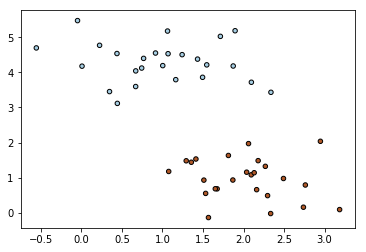

In [41]:
# make graphs display correctly in jupyter notebook 
%matplotlib inline

# This example came from https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_separating_hyperplane.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs


# we create 50 separable points 
#########(TODO: try changing the parameter "cluster_std", what happens? why?)
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
            edgecolor='black', s=20)

plt.axis('tight')
plt.show()

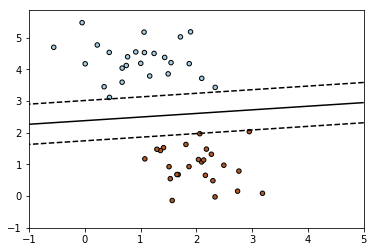

In [42]:
# fit the model 
#########(TODO: try messing with "max_iter", what are you changing? what happens? why?)
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200, fit_intercept=True)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]


# Plot the data with the fitted line
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
            edgecolor='black', s=20)

plt.axis('tight')
plt.show()


In [4]:
# Example from: https://github.com/mattnedrich/GradientDescentExample
# Article link: https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/

from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt("linear_regression_points_data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))

In [5]:
run()

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1000 iterations b = 0.0889365199374, m = 1.47774408519, error = 112.614810116
